In [158]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
from data import transforms
from PIL import Image
import torch
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
img_size=640
interpolation='bilinear'

In [160]:
fill_color = transforms.resolve_fill_color("mean", transforms.IMAGENET_DEFAULT_MEAN)


In [168]:
image_tfl = [
    #transforms.RandomRotation(rotation=90),
    transforms.ColorTransform(brightness=(0.7,3), contrast=(0.8, 1.5), satuation=(0.5,1.5), hue=(-0.2, 0.2)),
    transforms.RandomFlip(horizontal=True, prob=0.5),
    transforms.RandomResizePad(target_size=img_size, interpolation=interpolation, scale=(0.5,3.), fill_color=fill_color),
    transforms.ImageToNumpy()
]

In [169]:
image_tf = transforms.Compose(image_tfl)

In [170]:
image_name = "./test_imgs/aug_test.jpg"


In [171]:
im = Image.open(image_name).convert('RGB')

In [172]:
im.size

(1920, 1080)

In [173]:
np_img = np.array(im, dtype=np.uint8)
np_img = np.moveaxis(np_img, 2, 0)
#torch_img = torch.from_numpy(np_img).to(dtype=torch.float32)


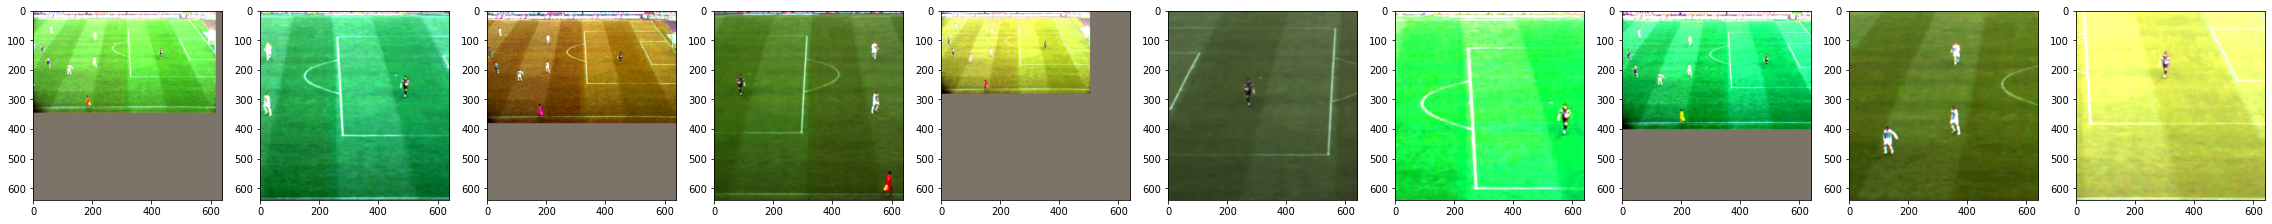

In [176]:
plt.figure(figsize=(40, 200))
for i in range(10):
    aug_img, ann = image_tf(im, {})
    aug_img = aug_img.transpose((1,2,0))
    plt.subplot(1, 10, i+1)
    plt.imshow(aug_img)
plt.show()